Let's study the motion of a system of $N$ identical masses joined by identical linear springs 
(see the picture below)  

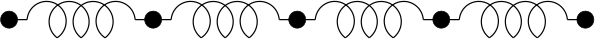

The horizontal displacements $x_i$ of masses $i=1\ldots N$
satisfy equations of motion
\begin{align*}
m {d^2x_1\over d t^2} &= k(x_2-x_1) + F_1,\\
m {d^2x_i\over d t^2} &= k(x_{i+1}-x_i) + k(x_{i-1}-x_i) + F_i\,,
  \\
  \vdots\\
m {d^2 x_N\over d t^2} &= k(x_{N-1}-x_N) + F_N.
\end{align*}
where $m$ is the mass, $k$ is the spring constant, and $F_i$ is the
external force on mass $i$.  Here we'll solve them more directly.

In this problem you are asked to use the fourth-order Runge--Kutta method to solve for the motion of the masses for the case $m=1$ and $k=6$, and the driving forces are all zero except for $F_1 = \cos\omega t$ with $\omega=2$. The initial conditions are zeroes for all displacements and zeroes for all velocities. The equations must be integrated from $t=0$ to $t=30$.


a) **Encode the righthand side of the system of the differential equations to work with general $N$ (assuming $N>1$)**. Put the righthand side of the equations in a class with attributes $k$, $m$ and $\omega$. You will need first of all need to think how to convert the $N$ second-order equations of motion into $2N$ first-order equations ($N$ positions and $N$ velocities).

b) Solve the system of equations for $N=4$. Plot your solutions for the displacements $x_i$ of all the masses as a function of time on the same plot (using different colors). Make your plot bigger using parameter figsize = (12,5).

c) Solve the system of equations for $N=20$. Plot your solutions for the displacements $x_2$, $x_{11}$ and $x_{19}$ as a function of time on the same plot (using different colors). Make your plot bigger using parameter figsize = (12,5).

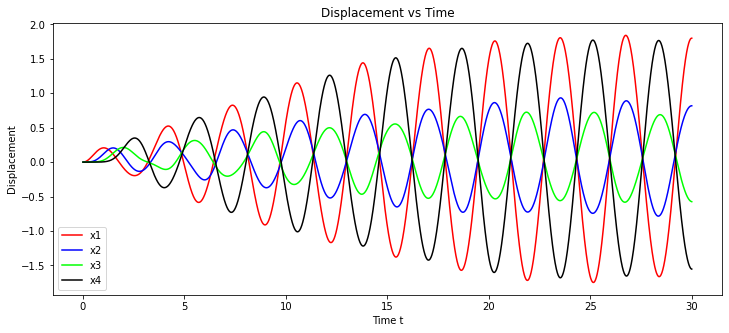

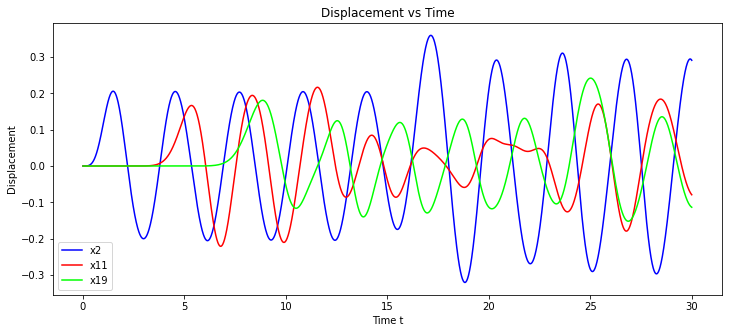

In [1]:
from numpy import arange, empty, array, shape, zeros, ravel
from math import cos
import matplotlib.pyplot as plt

# a)
def RK4(f, ti, tf, h, yinit):
    '''
    Implements the fourth order Runge Kutta method for solving an initial value
      problem for a system of n ordinary differential equations. f is the vector
      function, ti and tf are the initial and final times, respectively, h is the
      step size, and yinit are the initial conditions.
    
    RK4: Func Float Float Float List(Float(s)) -> Array
    requires: ti < tf
    
    Example
    -------
    dy/dt = 5*y(t), y(0) = 0
    
    def f(t, y):
        return array([5*y[0]])
        
    RK4(f, 0.0, 1.0, 0.5, [0.0]) returns an array:
     index 0 is time values
     index [1][0] are values of y(t)
     index [1][1] are values of y'(t)
    '''    
    Nsteps = int((tf - ti)/h) # number of steps
    t = h * arange(Nsteps) # grid for the independent variable   
    y = empty([len(yinit), len(t)]) #(n, Nstep) array for the dependent variable.
    ys = array(yinit) #ys is a n-dim buffer array. Set it to the initial conditions.

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
    return t, y

class SpringMassSystem:
    def __init__(self, k, m, omega):
        self.k, self.m, self.omega = k, m, omega
    
    def f(self, t, y):
        temp = zeros(shape=(N,2)) # initialize empty Nx2 array
        for i in range(0, N): # fill indices of temp with desired values in loop
            if i == 0:
                temp[i] = array([y[1], (self.k*(y[2]-y[0]) + cos(self.omega*t))/self.m]) # x1 case
            elif i == N-1:
                temp[i] = array([y[2*N-1], (self.k*(y[2*N-4]-y[2*N-2]))/self.m]) # xN case
            else:
                temp[i] = array([y[2*i+1], (self.k*(y[2*i-2]+y[2*i+2]-2*y[2*i]))/self.m]) # xi, i=2,..,N-1 case
                
        return temp.ravel() # makes temp a Nx1 array

k, m, omega = 6, 1, 2
SMS = SpringMassSystem(k, m, omega)

# b)
N = 4
init_cond = zeros(shape=(2*N))
Spring_4_Mass = RK4(SMS.f, 0.0, 30.0, 0.01, init_cond)

%matplotlib inline
plt.figure(figsize=(12,5))
plt.plot(Spring_4_Mass[0], Spring_4_Mass[1][0], color="red", label="x1")
plt.plot(Spring_4_Mass[0], Spring_4_Mass[1][2], color="blue", label="x2")
plt.plot(Spring_4_Mass[0], Spring_4_Mass[1][4], color="lime", label="x3")
plt.plot(Spring_4_Mass[0], Spring_4_Mass[1][6], color="black", label="x4")
plt.title('Displacement vs Time')
plt.xlabel('Time t')
plt.ylabel('Displacement')
plt.legend(loc="lower left")
plt.show()

# c)
N = 20
init_cond = zeros(shape=(2*N))
Spring_20_Mass = RK4(SMS.f, 0.0, 30.0, 0.01, init_cond)

plt.figure(figsize=(12,5))
plt.plot(Spring_20_Mass[0], Spring_20_Mass[1][2], color="blue", label="x2")
plt.plot(Spring_20_Mass[0], Spring_20_Mass[1][20], color="red", label="x11")
plt.plot(Spring_20_Mass[0], Spring_20_Mass[1][36], color="lime", label="x19")
plt.title('Displacement vs Time')
plt.xlabel('Time t')
plt.ylabel('Displacement')
plt.legend(loc="lower left")
plt.show()

Consider the equation that defines the Bessel function $J_0(t)$

$$
y''(t) = -y(t) -{y'(t) \over t}, \qquad y(0) =1, \quad y'(0) =0.
$$

a) Integrate the equation using the fourth-order Runge--Kutta method from $t=0$ to $t=10$ using a rather small step $h=0.005$. You see the singular coefficient $1/t$ before the first derivative. Add $1.e^{-15}$ to the denominator for the program to work. Plot the solutions for $y(t)$ and $y'(t)$.

You now see that the Bessel function $J_0$ is a special function that passes through zero from time to time oscillating between the negative minima and positive maxima. Your next task is to determine the first two roots by combining the RK4 (or 'odeint') function and the two root-finding methods, bisection and Newton's. 

**An important issue** with the RK4 program used in the lectures is that it computes the values up to the moment $tf - h$ inclusive, with $h$ being the step. This is often enough for the plotting and visualization, but here in order to get the value at $tf$ one needs to call

RK4(f, ti, tf+h, h, yinit) 

and extract the last elements of the returned arrays.

b) Determine the values of the first two zeros of $J_0(t)$ you see on the plot using bisection method. In the RK4 (or 'odeint') program, use a very small step $h=0.0005$. For the accuracy in the bisection method put $eps = 1.e-6$, not smaller. Smaller $eps$ increases the time of calculations but does not make the numbers obtained closer to the much more precise values obtained from different approaches of `scipy.special` package (see part c)). 

c) Use the function `jn_zeros` from `scipy.special` module (i) to output the highly accurate values of the first two zeros and (ii) to print the accuracies of your computed roots (with respect to the ones given by `jn_zeros`). 

d) Repeat parts b) and c) using the Newton's method. If you use the function 'Newton' from the lectures, modify it so that the Bessel function and its derivative are not calculated twice by doing integration from 0 to the point of interest in the ODE solver. In this method, use $eps = 1.e-4$, not smaller. This is because trying to meet the necessary accuracy, values upon each iteration oscillate around the correct point amounting to a slower convergence.
You should notice that finding the roots using this method is much more time consuming but leads to the results noticeably closer to the actual ones compared to the binary search.   

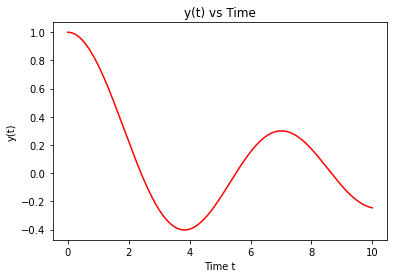

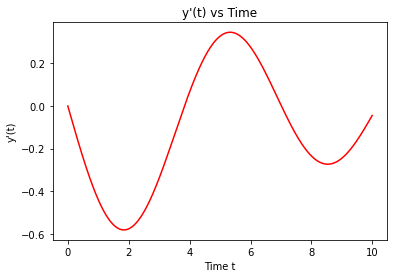

The first root, determined by the Bisection method, of the 0th order Bessel function is 2.4050002098083496
The second root, determined by the Bisection method, of the 0th order Bessel function is 5.5204997062683105
The first root of the 0th order Bessel function is 2.404825557695773
The first root of the 0th order Bessel function is 5.520078110286311
The accuracy for the first root using the Bisection method is 0.00017465211257672308
The accuracy for the second root using the Bisection method is 0.00042159598199997816
The first root, determined by the Newton's method, of the 0th order Bessel function is 2.4049369892398538
The second root, determined by the Newton's method, of the 0th order Bessel function is 5.520258434041633
The accuracy for the first root using the Bisection method is 0.00011143154408088662
The accuracy for the second root using the Bisection method is 0.00018032375532239797


In [148]:
from numpy import arange, empty, array
import matplotlib.pyplot as plt
from scipy.special import jn_zeros

# a)
def RK4(f, ti, tf, h, yinit):
    '''
    Implements the fourth order Runge Kutta method for solving an initial value
      problem for a system of n ordinary differential equations. f is the vector
      function, ti and tf are the initial and final times, respectively, h is the
      step size, and yinit are the initial conditions.
    
    RK4: Func Float Float Float List(Float(s)) -> Array
    requires: ti < tf
    
    Example
    -------
    dy/dt = 5*y(t), y(0) = 0
    
    def f(t, y):
        return array([5*y[0]])
        
    RK4(f, 0.0, 1.0, 0.5, [0.0]) returns an array:
     index 0 is time values
     index [1][0] are values of y(t)
     index [1][1] are values of y'(t)
    '''    
    Nsteps = int((tf - ti)/h) # number of steps
    t = h * arange(Nsteps) # grid for the independent variable   
    y = empty([len(yinit), len(t)]) #(n, Nstep) array for the dependent variable.
    ys = array(yinit) #ys is a n-dim buffer array. Set it to the initial conditions.

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
    return t, y
 
def f(t, y):
    return array([y[1], -y[0] - y[1]/(t+1.e-15)]) # no attributes, no need for class

init_cond = [1.0, 0.0]
bessel = RK4(f, 0.0, 10.0, 0.005, init_cond)

%matplotlib inline
plt.plot(bessel[0], bessel[1][0], color="red") # for function
plt.title('y(t) vs Time')
plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.show()

plt.plot(bessel[0], bessel[1][1], color="red") # for derivative
plt.title("y'(t) vs Time")
plt.xlabel('Time t')
plt.ylabel("y'(t)")
plt.show()

# b)
def Bisection(f, x1, x2, h, kmax=200, eps=1.e-6): # h included in function argument to avoid hardcoding
    x = None  # if all iterations are exhausted the function returns None
    
    init_cond = [1.0, 0.0] # given
    f1 = RK4(f, 0.0, x1+h, h, init_cond)[1][0][-1] # only care about last index (value of y(t) at t=x1+h)
    f2 = RK4(f, 0.0, x2+h, h, init_cond)[1][0][-1]
    
    if f1*f2 > 0: return None
    
    for k in range(kmax):
        xmid = (x1 + x2)/2
        fmid = RK4(f, 0.0, xmid+h, h, init_cond)[1][0][-1]
        
        if f1 * fmid > 0: x1 = xmid # root is not between x1 and xmid
        else: x2 = xmid
            
        if abs(x2-x1) < eps:
            x = 0.5*(x2+x1)
            break
    
    return x

root1_b = Bisection(f, 1.0, 3.0, 0.0005) # 1st root lies somewhere between x = 1.0 and x = 3.0
root2_b = Bisection(f, 5.0, 7.0, 0.0005) # 2nd root lies somewhere between x = 5.0 and x = 7.0
print("The first root, determined by the Bisection method, of the 0th order Bessel function is", root1_b)
print("The second root, determined by the Bisection method, of the 0th order Bessel function is", root2_b)

# c)
jn = jn_zeros(0,2) # returns array
print("The first root of the 0th order Bessel function is", jn[0])
print("The first root of the 0th order Bessel function is", jn[1])
print("The accuracy for the first root using the Bisection method is", abs(jn[0] - root1_b)) # assuming difference = accuracy
print("The accuracy for the second root using the Bisection method is", abs(jn[1] - root2_b))

# d)
def Newton(f, x0, h, kmax=200, eps=1.e-4): # h included in function argument to avoid hardcoding
    x = None # if all iterations are exhausted the function returns None
    
    init_cond = [1.0, 0.0] # given
    
    for k in range(kmax):
        bessel = RK4(f, 0.0, x0+h, h, init_cond) # only calculate RK4 once, save time
        f_x0 = bessel[1][0][-1]
        fprime_x0 = bessel[1][1][-1]
        
        x = x0 - f_x0/fprime_x0
        
        if abs(x-x0) < eps:
            break
        
        x0 = x
        
    return x

root1_n = Newton(f, 2.0, 0.0005) # start at x0 = 2.0
root2_n = Newton(f, 5.0, 0.0005) # start at x0 = 5.0
print("The first root, determined by the Newton's method, of the 0th order Bessel function is", root1_n)
print("The second root, determined by the Newton's method, of the 0th order Bessel function is", root2_n)
print("The accuracy for the first root using the Newton's method is", abs(jn[0] - root1_n))
print("The accuracy for the second root using the Newton's method is", abs(jn[1] - root2_n))